#  Projeto Final - Mobilidade em São Paulo/SP

##  Teste de hipótese

###  Importação de dados

In [5]:
# importando bibliotecas
from dotenv import load_dotenv, find_dotenv
import os

import sqlalchemy as db

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
# conectando com a base de dados do Postgres
db_server = 'postgresql'
ip = 'localhost'
db_name = 'transportesp'

# magically load environment variables from any .env files
load_dotenv(os.path.abspath('.env'))

user = os.getenv('DB_USERNAME')
password = os.getenv('DB_PASSWORD')

# create the engine
engine = db.create_engine(f'{db_server}://{user}:{password}@{ip}/{db_name}')

# open the connection
conn = engine.connect()

In [134]:
query = '''SELECT data, ano, semana, fim_de_semana, 
    SUM(pagantes_dinheiro) AS pagantes_dinheiro, SUM(pagantes_bu_e_vt) AS pagantes_bu_e_vt,
    SUM(pagantes_estudantes) AS pagantes_estudantes, SUM(total_estudantes) AS total_estudantes,
    SUM(passageiros_pagantes) AS passageiros_pagantes, SUM(gratuidades_outras) AS gratuidades_outras,
    SUM(integracao_onibus) AS integracao_onibus, SUM(total_passageiros) AS total_passageiros
    FROM passageiros_onibus
    GROUP BY data, ano, semana, fim_de_semana'''

In [135]:
# importando dados
onibus = pd.read_sql(query, con=conn)

###  Análise inicial

In [136]:
onibus.describe()

,ano,semana,fim_de_semana,pagantes_dinheiro,pagantes_bu_e_vt,pagantes_estudantes,total_estudantes,passageiros_pagantes,gratuidades_outras,integracao_onibus,total_passageiros
count,2314.000000,2314.000000,2314.000000,2314.000000,2.314000e+03,2314.000000,2.314000e+03,2.314000e+03,2.314000e+03,2.314000e+03,2.314000e+03
mean,2017.702679,25.870354,0.286517,407992.917459,2.737462e+06,111199.992221,6.488630e+05,3.538052e+06,9.494870e+05,1.845349e+06,6.870547e+06
std,1.855041,15.168560,0.452231,150042.372212,1.026865e+06,102877.244577,5.479490e+05,1.389201e+06,3.715555e+05,7.676187e+05,2.815225e+06
min,2015.000000,1.000000,0.000000,1267.000000,8.753500e+04,1254.000000,1.416000e+03,1.038060e+05,1.755000e+03,5.184500e+04,1.616550e+05
25%,2016.000000,13.000000,0.000000,282311.000000,1.929649e+06,26751.500000,8.882025e+04,2.369903e+06,5.904532e+05,1.167153e+06,4.192030e+06
50%,2018.000000,25.000000,0.000000,440656.500000,3.282780e+06,79255.000000,5.327155e+05,4.215981e+06,1.031450e+06,2.042592e+06,8.054128e+06
75%,2019.000000,39.000000,1.000000,507471.000000,3.574548e+06,173897.000000,1.118101e+06,4.705547e+06,1.286188e+06,2.542092e+06,9.519110e+06
max,2021.000000,53.000000,1.000000,899551.000000,7.581114e+06,628252.000000,1.843962e+06,8.558230e+06,2.650438e+06,3.875391e+06,1.508412e+07


In [137]:
onibus.corr()

,ano,semana,fim_de_semana,pagantes_dinheiro,pagantes_bu_e_vt,pagantes_estudantes,total_estudantes,passageiros_pagantes,gratuidades_outras,integracao_onibus,total_passageiros
ano,1.000000,-0.109201,0.000064,-0.665988,-0.279550,-0.443059,-0.423997,-0.425860,-0.226246,-0.482859,-0.437998
semana,-0.109201,1.000000,-0.003973,-0.006269,-0.001584,0.113155,0.278896,-0.002780,0.073483,-0.011639,0.055299
fim_de_semana,0.000064,-0.003973,1.000000,-0.436206,-0.712793,-0.406598,-0.372930,-0.666553,-0.601940,-0.650329,-0.643411
pagantes_dinheiro,-0.665988,-0.006269,-0.436206,1.000000,0.833220,0.683188,0.562662,0.905769,0.765524,0.910204,0.880725
pagantes_bu_e_vt,-0.279550,-0.001584,-0.712793,0.833220,1.000000,0.676441,0.619302,0.980591,0.921358,0.943872,0.958665
pagantes_estudantes,-0.443059,0.113155,-0.406598,0.683188,0.676441,1.000000,0.641242,0.739636,0.617832,0.706749,0.727494
total_estudantes,-0.423997,0.278896,-0.372930,0.562662,0.619302,0.641242,1.000000,0.670987,0.717465,0.664092,0.778075
passageiros_pagantes,-0.425860,-0.002780,-0.666553,0.905769,0.980591,0.739636,0.670987,1.000000,0.909570,0.979744,0.984219
gratuidades_outras,-0.226246,0.073483,-0.601940,0.765524,0.921358,0.617832,0.717465,0.909570,1.000000,0.875191,0.936520
integracao_onibus,-0.482859,-0.011639,-0.650329,0.910204,0.943872,0.706749,0.664092,0.979744,0.875191,1.000000,0.975069


C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_passageiros', ylabel='Density'>

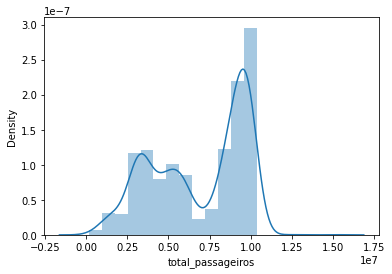

In [138]:
sns.distplot(onibus['total_passageiros'])

C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_passageiros', ylabel='Density'>

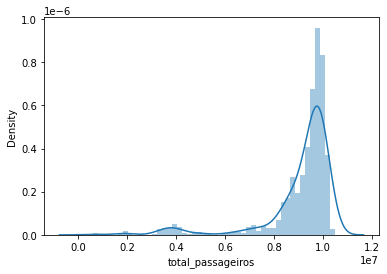

In [139]:
sns.distplot(onibus.loc[(onibus['fim_de_semana']==0)&(onibus['ano']<2019),'total_passageiros'])

C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_passageiros', ylabel='Density'>

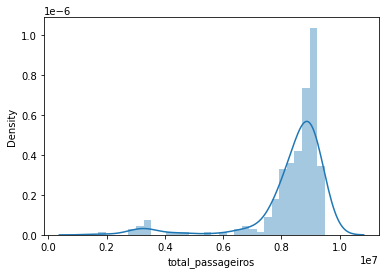

In [140]:
sns.distplot(onibus.loc[(onibus['fim_de_semana']==0)&(onibus['ano']==2019),'total_passageiros'])

C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_passageiros', ylabel='Density'>

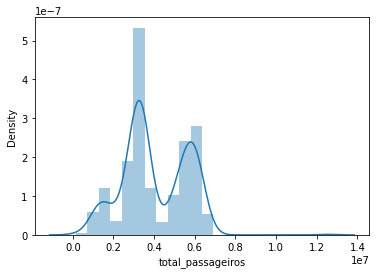

In [141]:
sns.distplot(onibus.loc[onibus['fim_de_semana']==1,'total_passageiros'])

C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_passageiros', ylabel='Density'>

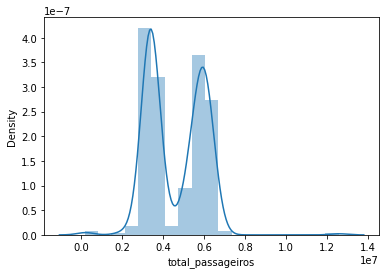

In [142]:
sns.distplot(onibus.loc[(onibus['fim_de_semana']==1)&(onibus['ano']<2019),'total_passageiros'])

C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_passageiros', ylabel='Density'>

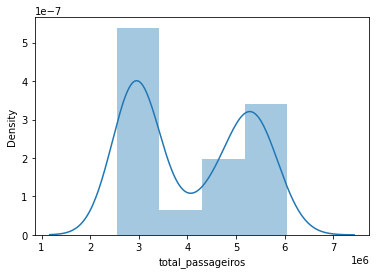

In [143]:
sns.distplot(onibus.loc[(onibus['fim_de_semana']==1)&(onibus['ano']==2019),'total_passageiros'])

<AxesSubplot:xlabel='data', ylabel='total_passageiros'>

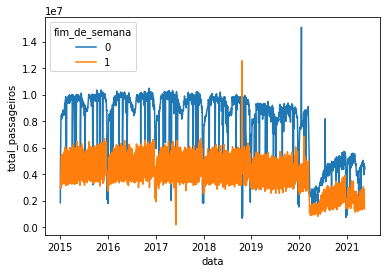

In [144]:
sns.lineplot(x='data', y='total_passageiros', hue='fim_de_semana', data=onibus)

<AxesSubplot:xlabel='data', ylabel='total_passageiros'>

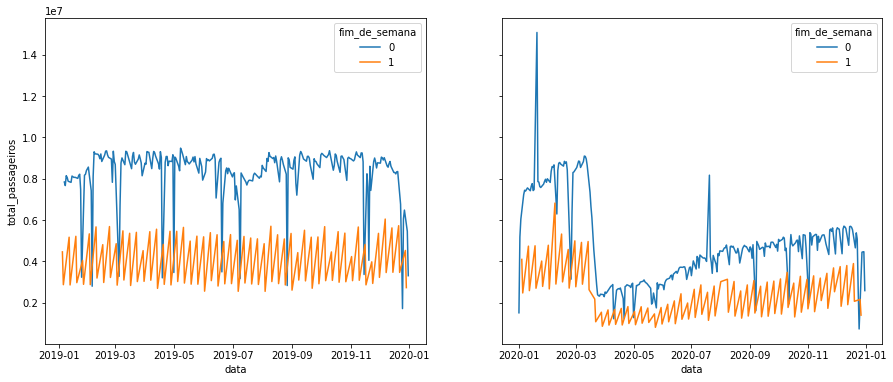

In [145]:
fig, ax = plt.subplots(1,2, sharey = 'row', figsize=(15,6))

sns.lineplot(x='data', y='total_passageiros', hue='fim_de_semana', data=onibus[onibus['ano']==2019], ax = ax[0])
sns.lineplot(x='data', y='total_passageiros', hue='fim_de_semana', data=onibus[onibus['ano']==2020], ax = ax[1])

<AxesSubplot:xlabel='data', ylabel='total_passageiros'>

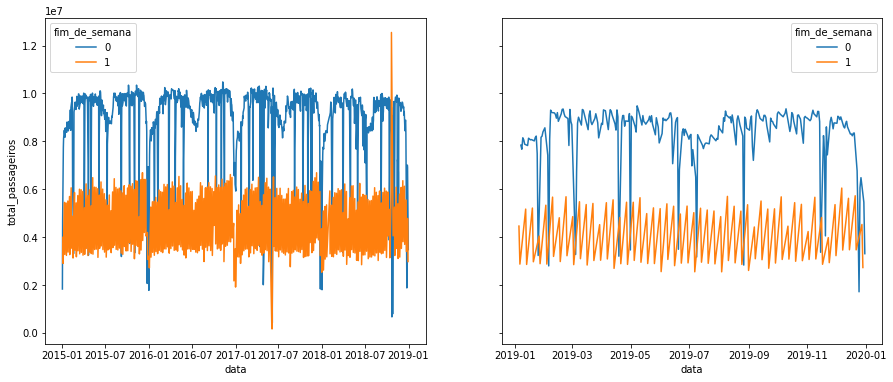

In [146]:
fig, ax = plt.subplots(1,2, sharey = 'row', figsize=(15,6))

sns.lineplot(x='data', y='total_passageiros', hue='fim_de_semana', data=onibus[onibus['ano']<2019], ax = ax[0])
sns.lineplot(x='data', y='total_passageiros', hue='fim_de_semana', data=onibus[onibus['ano']==2019], ax = ax[1])

<AxesSubplot:xlabel='data', ylabel='total_estudantes'>

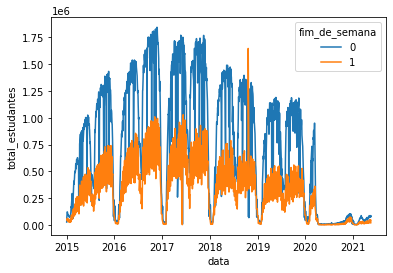

In [147]:
# Avaliando evolução do total de estudantes por semana
sns.lineplot(x='data', y='total_estudantes', hue='fim_de_semana', data=onibus)

###  Teste de hipótese

Para o teste de hipótese, será utilizado apenas o total de passageiros por semana.

A hipótese nula é de que a média de passageiros de 2019 é igual à média dos anos anteriores

A hipótese alternativa diz que as médias não são iguais.

Buscando um nível de significância de 5%, iremos aplicar o T-test.

In [165]:
dist_historica = onibus.loc[(onibus['ano']<2019)&(onibus['fim_de_semana']==0), 'total_passageiros']
dist_2019 = onibus.loc[(onibus['ano']==2019)&(onibus['fim_de_semana']==0), 'total_passageiros']

In [178]:
# testando a hipotese nula de que o ano de 2019 tem a mesma média diária igual à média dos anos anteriores.
stats.ttest_1samp(dist_2019, dist_historica.mean())

Ttest_1sampResult(statistic=-8.54398636915948, pvalue=1.1811568434011342e-15)

In [151]:
stats.ttest_ind(dist_2019, dist_historica)

Ttest_indResult(statistic=-6.770926720805102, pvalue=1.9376115335072776e-11)

In [117]:
import researchpy as rp

In [152]:
rp.ttest(dist_historica, dist_2019, paired = False, equal_variances=False)

(            Variable       N          Mean            SD            SE  \
 0  total_passageiros  1036.0  9.061832e+06  1.568421e+06  48728.479565   
 1  total_passageiros   257.0  8.340804e+06  1.352877e+06  84390.137046   
 2           combined  1293.0  8.918518e+06  1.554392e+06  43227.625859   
 
       95% Conf.      Interval  
 0  8.966214e+06  9.157450e+06  
 1  8.174616e+06  8.506991e+06  
 2  8.833714e+06  9.003322e+06  ,
                                       Welch's t-test      results
 0  Difference (total_passageiros - total_passagei...  721028.1806
 1                              Degrees of freedom =      442.9852
 2                                               t =        7.3991
 3                           Two side test p value =        0.0000
 4                          Difference < 0 p value =        1.0000
 5                          Difference > 0 p value =        0.0000
 6                                       Cohen's d =        0.5156
 7                           

In [149]:
# teste de Shapiro_Wilk
stats.shapiro(dist_2019)

ShapiroResult(statistic=0.6130475997924805, pvalue=1.1335838122439124e-23)

Com este resultado, observamos que a distribuição de 2019 não é normalmente distribuída. Por isso, tentaremos o teste de Wilcoxon Signed Ranks.

In [177]:
stats.wilcoxon(dist_historica[-257:], dist_2019)

WilcoxonResult(statistic=5335.0, pvalue=4.32916429450305e-21)

Assim, a hipótese nula foi rejeitada.

No entanto, podemos observar que, em um teste ANOVA entre os anos, a hipótese nula (médias iguais) também foi rejeitada.
Uma conclusão que podemos chegar, é que a média de passageiros de onibus na cidade de São Paulo não se mantém estável, e portanto, esta linha de estudo foi uma perda de tempo.

In [153]:
d_2015 = onibus.loc[(onibus['ano']==2015)&(onibus['fim_de_semana']==0), 'total_passageiros']
d_2016 = onibus.loc[(onibus['ano']==2016)&(onibus['fim_de_semana']==0), 'total_passageiros']
d_2017 = onibus.loc[(onibus['ano']==2017)&(onibus['fim_de_semana']==0), 'total_passageiros']
d_2018 = onibus.loc[(onibus['ano']==2018)&(onibus['fim_de_semana']==0), 'total_passageiros']

In [154]:
stats.f_oneway(d_2015, d_2016, d_2017, d_2018, dist_2019)

F_onewayResult(statistic=14.178121388600665, pvalue=2.5008980140616622e-11)